In [13]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.manifold import TSNE
from sklearn import decomposition
from umap import UMAP

https://predictivehacks.com/k-means-elbow-method-code-for-python/#:~:text=K%2DMeans%20is%20an%20unsupervised,optimal%20for%20the%20specific%20case.

In [2]:
data = load_wine(as_frame=True)
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [3]:
df = pd.DataFrame(np.c_[data['data'], data['target']], columns= np.append(data['feature_names'], ['target']))

In [4]:
df.head()
df.shape

(178, 14)

In [5]:
data = df[0:178]
data = np.asarray(data)
data

array([[  14.23,    1.71,    2.43, ...,    3.92, 1065.  ,    0.  ],
       [  13.2 ,    1.78,    2.14, ...,    3.4 , 1050.  ,    0.  ],
       [  13.16,    2.36,    2.67, ...,    3.17, 1185.  ,    0.  ],
       ...,
       [  13.27,    4.28,    2.26, ...,    1.56,  835.  ,    2.  ],
       [  13.17,    2.59,    2.37, ...,    1.62,  840.  ,    2.  ],
       [  14.13,    4.1 ,    2.74, ...,    1.6 ,  560.  ,    2.  ]])

In [6]:
scaled_data = StandardScaler().fit_transform(data)
print(scaled_data.shape)

(178, 14)


In [7]:
no_clusters = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean.fit(scaled_data)
    no_clusters.append(kmean.inertia_)

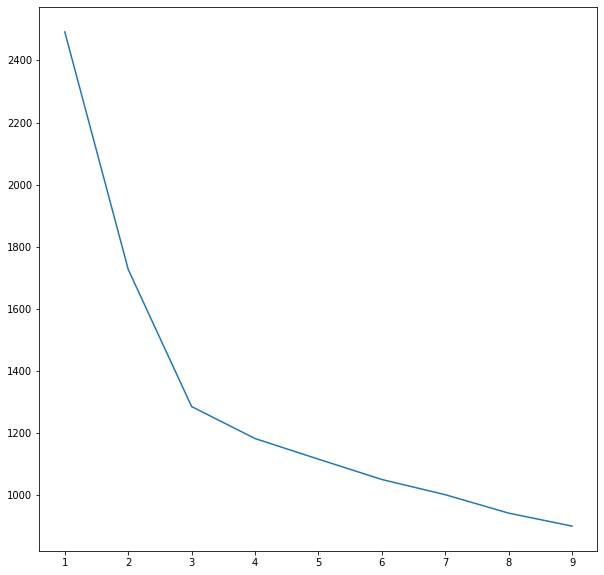

In [8]:
plt.figure(figsize=(10,10))
plt.plot(K, no_clusters)
plt.show()

In [9]:
kmean = KMeans(n_clusters=3)
kmean.fit(scaled_data)
labels = kmean.predict(scaled_data)

Text(0.5, 1.0, 'With KMeans')

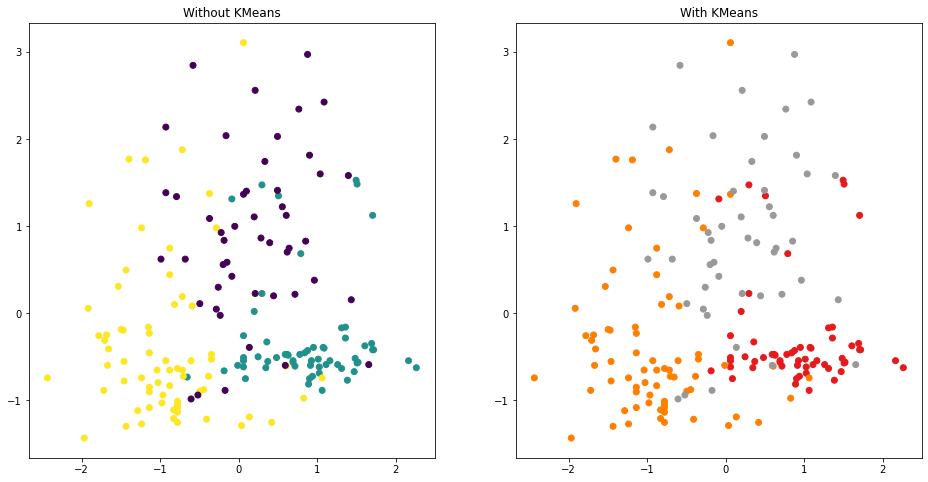

In [10]:
x1 = scaled_data[:,0]
y1 = scaled_data[:,1]
x2 = scaled_data[:,0]
y2 = scaled_data[:,1]
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].scatter(x1, y1, c=labels)
ax[1].scatter(x2, y2, c=df['target'], cmap=plt.cm.Set1)
ax[0].set_title('Without KMeans')
ax[1].set_title('With KMeans')

In [11]:
reducer = UMAP()
embedded = reducer.fit_transform(scaled_data)

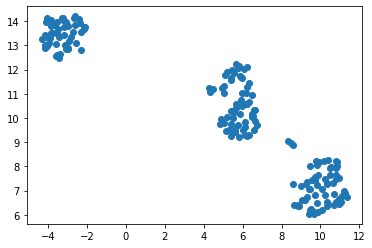

In [12]:
plt.scatter(embedded[:,0], embedded[:,1])
plt.show()

PCA

In [15]:
pca_full_df = PCA(n_components=14)
pca_full_df.fit(scaled_data)

PCA(n_components=14)

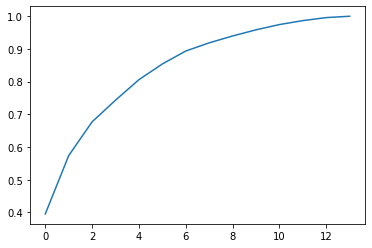

In [16]:
plt.plot(np.cumsum(pca_full_df.explained_variance_ratio_))
plt.show()

In [25]:
#Not a clear plateu, if using 6 the variance ratio is low (0.85), going up to 10 leaves us with 0.958
print(np.cumsum(pca_full_df.explained_variance_ratio_)[9])

0.9584270259947616


In [26]:
pca = PCA(n_components=10)
pca_data = pca.fit_transform(scaled_data)

In [27]:
model = KMeans(n_clusters=3)
model.fit(pca_data)
pca_labels = model.predict(pca_data)

Text(0.5, 1.0, 'PCA KMeans')

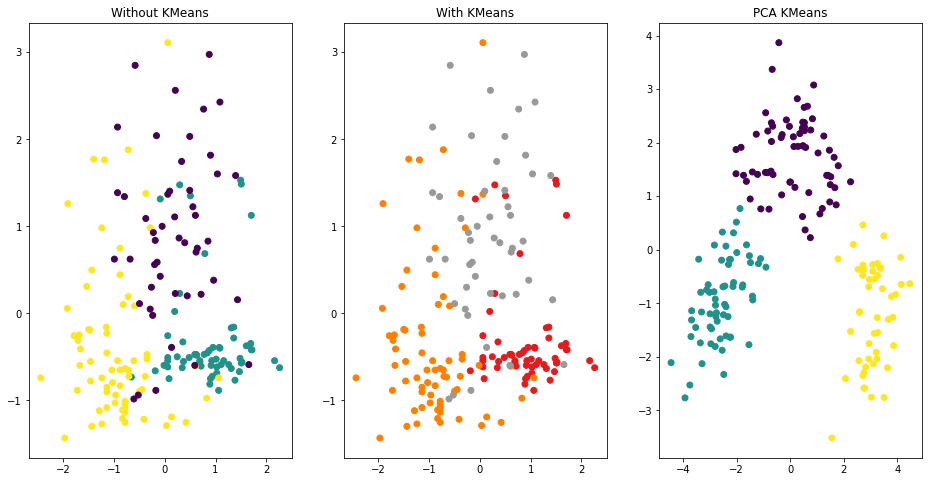

In [28]:
x1 = scaled_data[:,0]
y1 = scaled_data[:,1]
x2 = scaled_data[:,0]
y2 = scaled_data[:,1]
x3 = pca_data[:,0]
y3 = pca_data[:,1]
fig, ax = plt.subplots(1, 3, figsize=(16,8))
ax[0].scatter(x1, y1, c=labels)
ax[1].scatter(x2, y2, c=df['target'], cmap=plt.cm.Set1)
ax[2].scatter(x3, y3, c=pca_labels)
ax[0].set_title('Without KMeans')
ax[1].set_title('With KMeans')
ax[2].set_title('PCA KMeans')

In [29]:
umap = UMAP()
visualised = umap.fit_transform(pca_data)

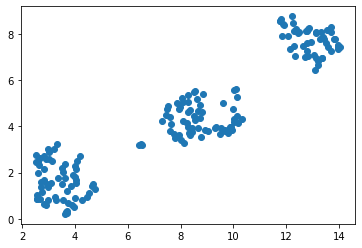

In [30]:
plt.scatter(visualised[:,0], visualised[:,1])
plt.show()